In [41]:
import pandas as pd
import numpy as np

In [42]:
df = pd.read_csv('Data/SEER_Raw_Data.csv')

In [43]:
df[['ICD-O-3 Hist/behav','Primary Site - labeled']]

,ICD-O-3 Hist/behav,Primary Site - labeled
0,9699/3: Extranodal marginal zone lymphoma of m...,"C34.1-Upper lobe, lung"
1,"8250/3: Bronchiolo-alveolar adenocarcinoma, NOS","C34.3-Lower lobe, lung"
2,"8140/3: Adenocarcinoma, NOS",C34.0-Main bronchus
3,"8070/3: Squamous cell carcinoma, NOS","C34.3-Lower lobe, lung"
4,"8041/3: Small cell carcinoma, NOS","C34.1-Upper lobe, lung"
...,...,...
1013300,"8000/3: Neoplasm, malignant","C34.9-Lung, NOS"
1013301,"8000/3: Neoplasm, malignant","C34.9-Lung, NOS"
1013302,"8000/3: Neoplasm, malignant","C34.9-Lung, NOS"
1013303,"8000/3: Neoplasm, malignant","C34.9-Lung, NOS"


In [44]:
df.shape

(1013305, 39)

In [45]:
def metadata(df):
    columns_list = list(df.columns.values)
    metadata = pd.DataFrame(columns_list, columns=['col_name'])

    # Data types
    metadata['data_type'] = [i for i in df.dtypes.astype(str)]

    # Missing values
    metadata['missing_values'] = [i for i in df.isnull().sum()]

    # Missing values percentage in two digits number
    metadata['missing_values_percentage'] = [round(i*100,2) for i in df.isnull().sum() / df.shape[0]]
    
    # Number of unique values
    metadata['unique_values'] = [i for i in df.nunique()]

    # Number of unique values percentage
    metadata['unique_values_percentage'] = [round(i*100,2) for i in df.nunique() / df.shape[0]]

    # Basic statistics for interval columns
    interval_columns = [col for col in columns_list if df[col].dtype != 'object']
    desc_interval = df[interval_columns].agg(['min', 'max', 'std']).transpose().reset_index().rename(columns={'index': 'col_name'})
    metadata = metadata.merge(desc_interval, on='col_name', how='left')

    return metadata

In [46]:
metadata(df)

,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,Patient ID,int64,0,0.00,981046,96.82,139.0,63289407.0,1.836082e+07
1,Age recode with <1 year olds,object,0,0.00,19,0.00,NaN,NaN,NaN
2,Sex,object,0,0.00,2,0.00,NaN,NaN,NaN
3,Year of diagnosis,int64,0,0.00,21,0.00,2000.0,2020.0,6.014838e+00
4,"Race recode (W, B, AI, API)",object,0,0.00,5,0.00,NaN,NaN,NaN
5,"Origin recode NHIA (Hispanic, Non-Hisp)",object,0,0.00,2,0.00,NaN,NaN,NaN
6,"Race and origin recode (NHW, NHB, NHAIAN, NHAP...",object,0,0.00,6,0.00,NaN,NaN,NaN
7,Site recode ICD-O-3/WHO 2008,object,0,0.00,8,0.00,NaN,NaN,NaN
8,Behavior code ICD-O-3,object,0,0.00,1,0.00,NaN,NaN,NaN
9,Primary Site - labeled,object,0,0.00,6,0.00,NaN,NaN,NaN


In [47]:
df['Behavior code ICD-O-3'].value_counts()

Behavior code ICD-O-3
Malignant    1013305
Name: count, dtype: int64

In [48]:
df['AFP Pretreatment Interpretation Recode (2010+)'].value_counts()

AFP Pretreatment Interpretation Recode (2010+)
Blank(s)    1013305
Name: count, dtype: int64

In [49]:
df['ICD-O-3 Hist/behav'].value_counts().sort_index()

ICD-O-3 Hist/behav
8000/3: Neoplasm, malignant                                        76144
8001/3: Tumor cells, malignant                                       261
8002/3: Malignant tumor, small cell type                              32
8003/3: Malignant tumor, giant cell type                              22
8004/3: Malignant tumor, spindle cell type                            59
                                                                   ...  
9823/3: Chronic lymphocytic leukemia/small lymphocytic lymphoma       31
9827/3: Adult T-cell leukemia/lymphoma                                 2
9837/3: T lymphoblastic leukemia/lymphoma                              4
9930/3: Myeloid sarcoma                                                8
9971/3: Polymorphic PTLD                                              26
Name: count, Length: 275, dtype: int64

In [50]:
df['Primary Site - labeled'].value_counts().sort_index()

Primary Site - labeled
C34.0-Main bronchus                  46132
C34.1-Upper lobe, lung              484790
C34.2-Middle lobe, lung              42522
C34.3-Lower lobe, lung              249516
C34.8-Overlapping lesion of lung     11596
C34.9-Lung, NOS                     178749
Name: count, dtype: int64

In [51]:
# filter the ICD-O-3 Hist/behav categories that start with 804
# Define the codes to keep
codes_to_keep = ['8002', '8041', '8042', '8043', '8044', '8045', '8012', '8013', '8014', '8021', '8034', '8082', '8046']

# Filter the DataFrame
df_filtered = df[df['ICD-O-3 Hist/behav'].astype(str).str.startswith(tuple(codes_to_keep))]

df_filtered.shape

(238086, 39)

In [52]:
df['Year of diagnosis'].value_counts().sort_index()

Year of diagnosis
2000    45971
2001    46474
2002    46666
2003    46961
2004    46922
2005    47642
2006    48199
2007    48460
2008    48715
2009    49499
2010    48315
2011    47932
2012    48729
2013    48855
2014    49497
2015    49828
2016    49879
2017    50258
2018    49502
2019    50432
2020    44569
Name: count, dtype: int64

In [53]:
df_filtered['ICD-O-3 Hist/behav'].value_counts().sort_index()

ICD-O-3 Hist/behav
8002/3: Malignant tumor, small cell type                    32
8012/3: Large cell carcinoma, NOS                        16128
8013/3: Large cell neuroendocrine carcinoma               5806
8014/3: Large cell carcinoma with rhabdoid phenotype        42
8021/3: Carcinoma, anaplastic, NOS                         228
8034/3: Polygonal cell carcinoma                             5
8041/3: Small cell carcinoma, NOS                       112714
8042/3: Oat cell carcinoma                                4464
8043/3: Small cell carcinoma, fusiform cell                 67
8044/3: Small cell carcinoma, intermediate cell            657
8045/3: Combined small cell carcinoma                     2194
8046/3: Non-small cell carcinoma                         95660
8082/3: Lymphoepithelial carcinoma                          89
Name: count, dtype: int64

In [54]:
# Define the mapping of codes to groups
sclc_codes = ['8002', '8041', '8042', '8043', '8044']
nsclc_codes = ['8012', '8013', '8014', '8021', '8034', '8082', '8046']
csclc_code = '8045'

# Function to categorize each row
def categorize(row):
    code = row['ICD-O-3 Hist/behav']
    if str(code).startswith(tuple(sclc_codes)):
        return 'SCLC'
    elif str(code).startswith(tuple(nsclc_codes)):
        return 'NSCLC'
    elif str(code).startswith(csclc_code):
        return 'CSCLC'
    else:
        return 'Other'
    
# Apply the function
df_filtered['Lung Cancer Group'] = df_filtered.apply(categorize, axis=1)

C:\Users\yuyum\AppData\Local\Temp\ipykernel_44660\118181357.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Lung Cancer Group'] = df_filtered.apply(categorize, axis=1)


In [55]:
df_filtered['Lung Cancer Group'].value_counts(dropna=False)

Lung Cancer Group
NSCLC    117958
SCLC     117934
CSCLC      2194
Name: count, dtype: int64

In [61]:
# Codes to drop
codes_to_drop = list(range(8580, 10000)) + [8005, 8095, 8124, 8130, 8146, 8160, 8170, 8231, 8247, 8263, 8312, 8340, 8341, 8350, 8370, 8441, 8460, 8500, 8501, 8510, 8524, 8530, 8551]
codes_to_drop = [str(code) for code in codes_to_drop] # Convert all codes to strings

# Drop the specified codes
df_filtered = df[~df['ICD-O-3 Hist/behav'].astype(str).str.startswith(tuple(codes_to_drop))].copy()

# Define the mapping of codes to groups
sclc_codes = ['8002', '8041', '8042', '8043', '8044']
csclc_code = '8045'

# Function to categorize each row
def categorize(row):
    code = row['ICD-O-3 Hist/behav']
    if str(code).startswith(tuple(sclc_codes)):
        return 'SCLC'
    elif str(code).startswith(csclc_code):
        return 'CSCLC'
    else:
        return 'NSCLC'

# Apply the function
df_filtered['Lung Cancer Group'] = df_filtered.apply(categorize, axis=1)

In [62]:
df_filtered['Lung Cancer Group'].value_counts(dropna=False)

Lung Cancer Group
NSCLC    877922
SCLC     117934
CSCLC      2194
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x18333386e10>,
 [Text(-1.0222920640972613, 0.40610212469742285, 'NSCLC'),
  Text(1.0194631271938441, -0.41315243227185316, 'SCLC'),
  Text(1.0999737684920516, -0.00759661960312245, 'CSCLC')],
 [Text(-0.5576138531439606, 0.2215102498349579, '88.0%'),
  Text(0.5560707966511876, -0.2253558721482835, '11.8%'),
  Text(0.5999856919047554, -0.004143610692612245, '0.2%')])

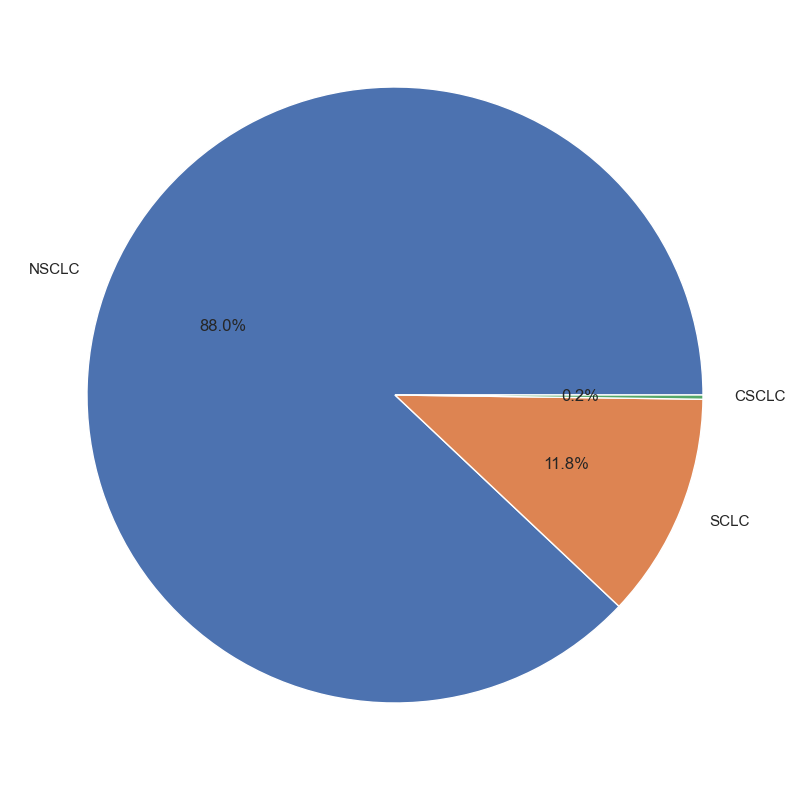

In [63]:
# use piechart and show the percentage of each group
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.pie(df_filtered['Lung Cancer Group'].value_counts(), labels=df_filtered['Lung Cancer Group'].value_counts().index, autopct='%1.1f%%')

In [21]:
# group the ICD-O-3 Hist/behav, "8041/3: Small cell carcinoma, NOS", "8042/3: Oat cell carcinoma",
# "8043/3: Small cell carcinoma, fusiform cell","8044/3: Small cell carcinoma, intermediate cell" into group called "SCLC", 
# and the "8045/3: Combined small cell carcinoma" into group called "CSCLC"
# "8046/3: Small cell carcinoma, hypercalcemic type" into group called "NSCLC"

df_filtered['ICD-O-3 Hist/behav Encoded'] = df_filtered['ICD-O-3 Hist/behav'].map({'8041/3: Small cell carcinoma, NOS': 'SCLC', 
                                                                                   '8042/3: Oat cell carcinoma': 'SCLC', 
                                                                                   '8043/3: Small cell carcinoma, fusiform cell': 'SCLC', 
                                                                                   '8044/3: Small cell carcinoma, intermediate cell': 'SCLC', 
                                                                                   '8045/3: Combined small cell carcinoma': 'CSCLC', 
                                                                                   '8046/3: Non-small cell carcinoma': 'NSCLC'})

df_filtered['ICD-O-3 Hist/behav Encoded'].value_counts().sort_index()


ICD-O-3 Hist/behav Encoded
CSCLC      2194
NSCLC     95660
SCLC     117902
Name: count, dtype: int64

C:\Users\yuyum\AppData\Local\Temp\ipykernel_44660\1449334797.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="ICD-O-3 Hist/behav Encoded", data=df_filtered, order=['SCLC','NSCLC', 'CSCLC'], palette="husl")


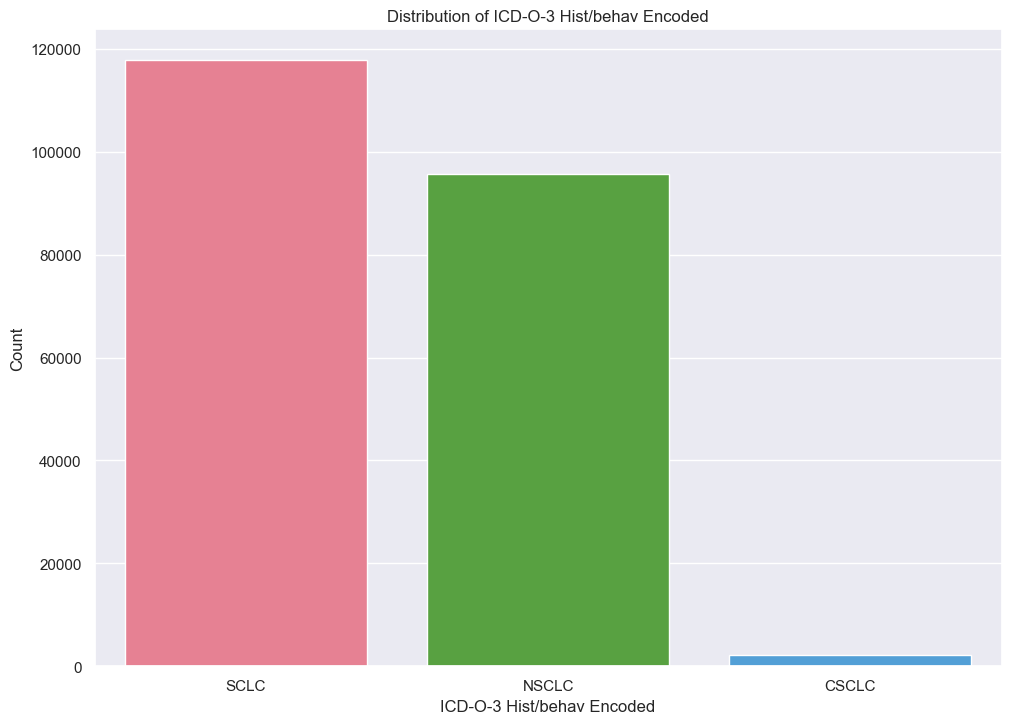

In [31]:
# use sns barplotto plot the distribution of the ICD-O-3 Hist/behav Encoded, with the actual count for each group
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x="ICD-O-3 Hist/behav Encoded", data=df_filtered, order=['SCLC','NSCLC', 'CSCLC'], palette="husl")
plt.title('Distribution of ICD-O-3 Hist/behav Encoded')
plt.xlabel('ICD-O-3 Hist/behav Encoded')
plt.ylabel('Count')
plt.show()

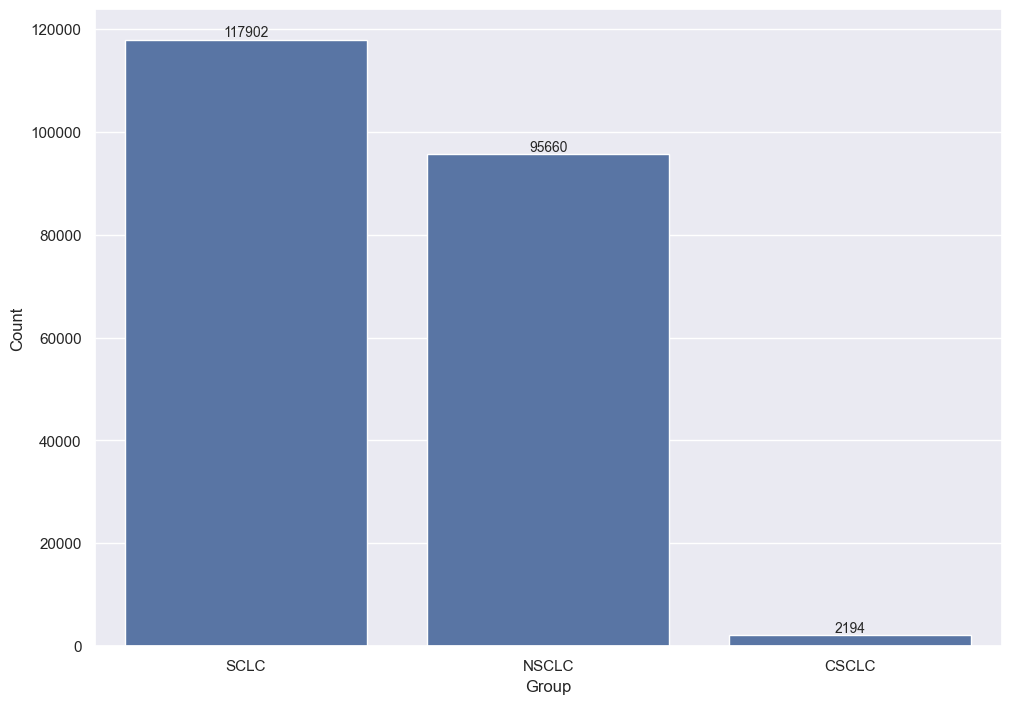

In [36]:
# Count the occurrences of each group
group_counts = df_filtered['ICD-O-3 Hist/behav Encoded'].value_counts().reset_index()
group_counts.columns = ['Group', 'Count']

ax = sns.barplot(group_counts, x="Group", y="Count", estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10)

In [69]:
# Define the codes to include
codes_to_include = ['8010', '8012', '8013', '8020', '8046', '8050', 
                    '8051', '8052', '8070', '8071', '8072', '8073',
                      '8074', '8075', '8076', '8077', '8078', '8140',
                        '8141', '8143', '8147', '8250', '8251', '8252',
                          '8253', '8254', '8255', '8260', '8310', '8430',
                            '8480', '8481', '8490', '8560', '8570', '8571',
                              '8572', '8573', '8574', '8575', '8002', '8041', '8042', '8043', '8044', '8045']

# Filter the DataFrame
df_filtered123 = df[df['ICD-O-3 Hist/behav'].astype(str).str[:4].isin(codes_to_include)].copy()

In [71]:
# Define the mapping of codes to groups
sclc_codes = ['8002', '8041', '8042', '8043', '8044']
csclc_code = '8045'

# Function to categorize each row
def categorize(row):
    code = row['ICD-O-3 Hist/behav']
    if str(code).startswith(tuple(sclc_codes)):
        return 'SCLC'
    elif str(code).startswith(csclc_code):
        return 'CSCLC'
    else:
        return 'NSCLC'

# Apply the function
df_filtered123['Lung Cancer Group'] = df_filtered123.apply(categorize, axis=1)


([<matplotlib.patches.Wedge at 0x18379e4ca90>,
 [Text(-1.0000345108253796, 0.45818225321180195, 'NSCLC'),
  Text(0.9964086216194059, -0.4660148696796226, 'SCLC'),
  Text(1.0999661383167094, -0.008631022918847058, 'CSCLC')],
 [Text(-0.5454733695411161, 0.24991759266098285, '86.3%'),
  Text(0.5434956117924031, -0.2541899289161577, '13.4%'),
  Text(0.5999815299909323, -0.004707830683007486, '0.2%')])

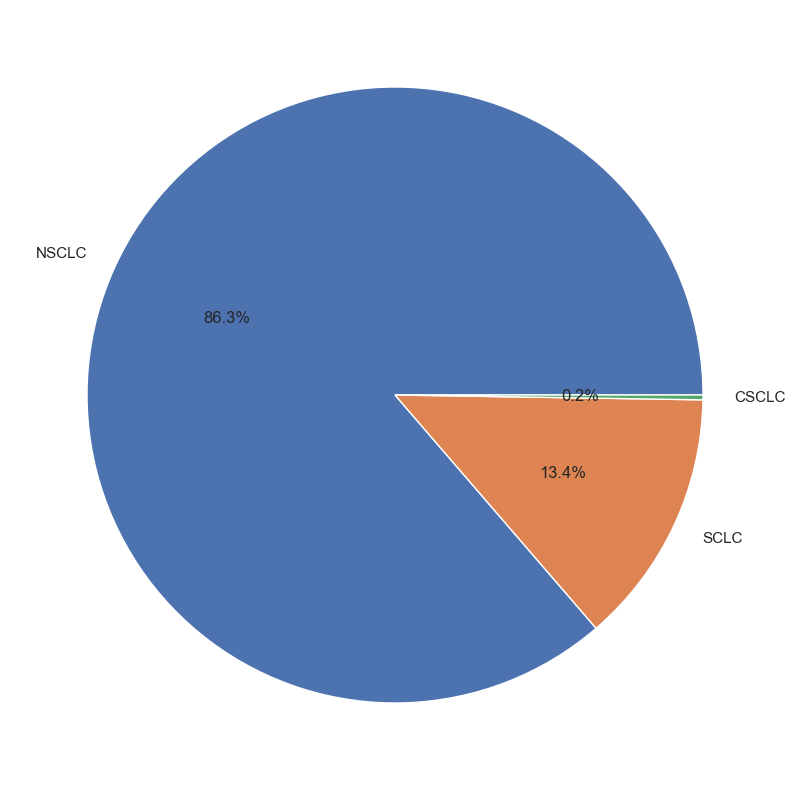

In [72]:
# use piechart and show the percentage of each group
plt.figure(figsize=(10,10))
plt.pie(df_filtered123['Lung Cancer Group'].value_counts(), labels=df_filtered123['Lung Cancer Group'].value_counts().index, autopct='%1.1f%%')

In [80]:
df_filtered123['Lung Cancer Group'].value_counts().sort_index()

Lung Cancer Group
CSCLC      2194
NSCLC    758298
SCLC     117934
Name: count, dtype: int64

In [93]:
df_filtered123['Year of diagnosis'].value_counts().sort_index() 

Year of diagnosis
2000    41439
2001    42040
2002    42012
2003    42139
2004    42077
2005    42435
2006    42759
2007    42646
2008    43045
2009    43577
2010    42405
2011    42026
2012    42337
2013    41954
2014    41999
2015    41949
2016    41678
2017    42396
2018    40512
2019    41104
2020    35897
Name: count, dtype: int64

In [81]:
df_filtered1234 = df_filtered123[df_filtered123['Year of diagnosis']!=2020].copy()

df_filtered1234['Lung Cancer Group'].value_counts().sort_index()

Lung Cancer Group
CSCLC      2088
NSCLC    727274
SCLC     113167
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1837f00f910>,
 [Text(-0.9999729000889278, 0.45831670173335315, 'NSCLC'),
  Text(0.9963743464121902, -0.466088148113295, 'SCLC'),
  Text(1.0999666616728754, -0.008564064936140337, 'CSCLC')],
 [Text(-0.5454397636848697, 0.2499909282181926, '86.3%'),
  Text(0.543476916224831, -0.25422989897088816, '13.4%'),
  Text(0.5999818154579319, -0.004671308146985638, '0.2%')])

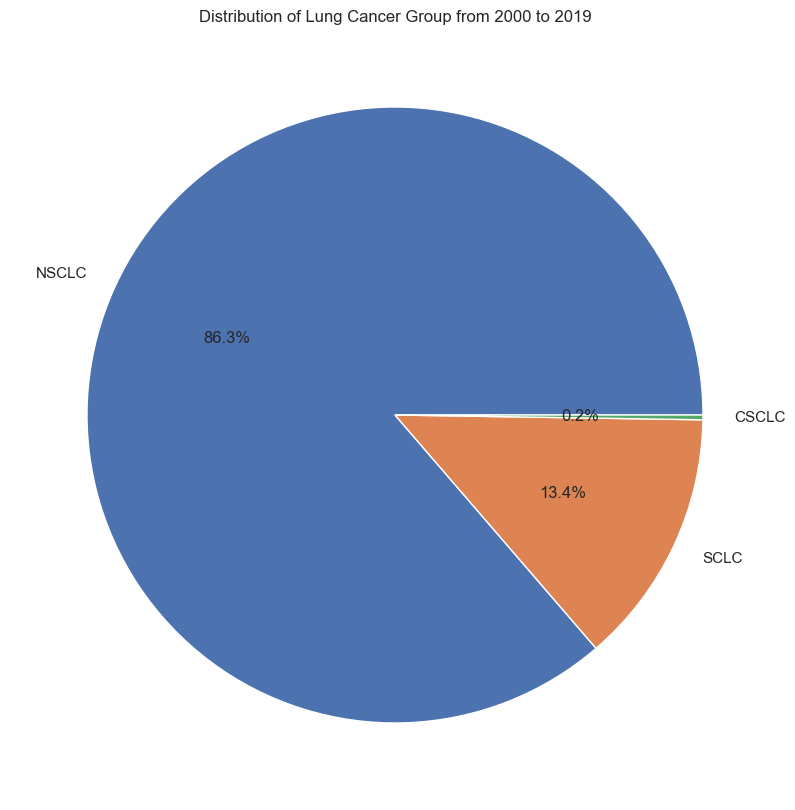

In [88]:
# use piechart and show the percentage of each group
plt.figure(figsize=(10,10))
plt.title('Distribution of Lung Cancer Group from 2000 to 2019')
plt.pie(df_filtered1234['Lung Cancer Group'].value_counts(), labels=df_filtered1234['Lung Cancer Group'].value_counts().index, autopct='%1.1f%%')

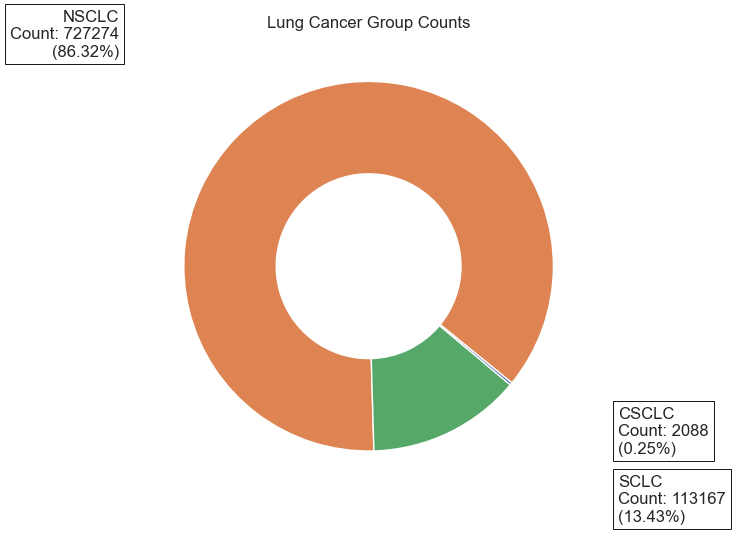

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Lung Cancer Groups
counts = [2088, 727274, 113167]
groups = ['CSCLC', 'NSCLC', 'SCLC']
total_count = sum(counts)
percentages = [f"{count/total_count*100:.2f}%" for count in counts]
data_labels = [f"{group}\nCount: {count}\n({percent})" for group, count, percent in zip(groups, counts, percentages)]

# Increase the figure size for better readability
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(counts, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(data_labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Lung Cancer Group Counts")

plt.show()


